In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import seaborn as sns

In [29]:
# import the scraped data
data = pd.read_csv('./data/sampled-data-for-annotation-after-annotation.csv')
data.head()

,Restaurant Name,Restaurant Type,Reviewer's Name,Rating,Comment,rating_class_main,rating_for_comment
0,Salt tapas & bar,"Bar, Mediterranean",ntan002,3,Easily accessible as it is next to one of the ...,0,0
1,Peach Blossoms,"Chinese, Asian",Willowsinoz,3,We went here thinking it would bea fine dining...,0,-1
2,Three Buns Quayside,"American, Bar",Tazziejosh,1,Had a horrible experience here. Stopped in for...,-1,-1
3,Ikoi Japanese Restaurant,"Japanese, Sushi",Faith L,3,Had a dinner here with my colleagues. It is al...,0,0
4,Waku Ghin,"Seafood, Asian",zephyrtan,5,"If You're In A Rush For Meeting , Theatre Or S...",1,1


In [30]:
# check data type
data.dtypes

Restaurant Name       object
Restaurant Type       object
Reviewer's Name       object
Rating                 int64
Comment               object
rating_class_main      int64
rating_for_comment     int64
dtype: object

In [33]:
# get annotator 1 annotation
annotator_1 = data['rating_class_main']
annotator_1[:5]

0    0
1    0
2   -1
3    0
4    1
Name: rating_class_main, dtype: int64

In [34]:
# get annotator 2 annotation
annotator_2 = data['rating_for_comment']
annotator_2[:5]

0    0
1   -1
2   -1
3    0
4    1
Name: rating_for_comment, dtype: int64

In [37]:
# get confusion matrix array
conf_matrix_arr = confusion_matrix(annotator_1, annotator_2)
conf_matrix_arr

array([[199,  45,   6],
       [168, 278,  54],
       [  5,  70, 175]], dtype=int64)

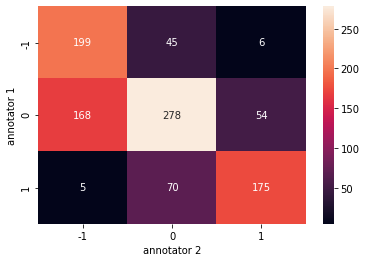

In [39]:
# seaborn cofusion matrix
cm_sns = pd.crosstab(annotator_1, annotator_2, rownames=['annotator 1'], colnames=['annotator 2'])
sns.heatmap(cm_sns, annot=True, fmt="d")

In [42]:
# cohen-kappa score
cohen_kappa_score(annotator_1, annotator_2)

0.46605293440736484